# リポジトリクローン

In [1]:
!git clone https://github.com/Shimmer93/MPCount

Cloning into 'MPCount'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 52 (delta 17), reused 44 (delta 13), pack-reused 0
Receiving objects: 100% (52/52), 36.29 KiB | 2.59 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [2]:
%cd MPCount

/content/MPCount


# 重みダウンロード

In [3]:
import gdown
gdown.download('https://drive.google.com/uc?id=1yHHZZTOaQ9fM56QuDB1HIna4K1p297nG', 'sta.pth', quiet=False)
gdown.download('https://drive.google.com/uc?id=1sYGMGNOqj0OUEz-5zE9S1G7hjOzmtJsZ', 'stb.pth', quiet=False)
gdown.download('https://drive.google.com/uc?id=16zqOyKsEevoxSFOCNcUakdIq0dsAns5v', 'qnrf.pth', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1yHHZZTOaQ9fM56QuDB1HIna4K1p297nG
From (redirected): https://drive.google.com/uc?id=1yHHZZTOaQ9fM56QuDB1HIna4K1p297nG&confirm=t&uuid=9d335254-44c2-4f30-a04c-4365b50d0446
To: /content/MPCount/sta.pth
100%|██████████| 133M/133M [00:03<00:00, 33.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1sYGMGNOqj0OUEz-5zE9S1G7hjOzmtJsZ
From (redirected): https://drive.google.com/uc?id=1sYGMGNOqj0OUEz-5zE9S1G7hjOzmtJsZ&confirm=t&uuid=62d18068-451e-4b68-92fe-525b05db828c
To: /content/MPCount/stb.pth
100%|██████████| 133M/133M [00:01<00:00, 93.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=16zqOyKsEevoxSFOCNcUakdIq0dsAns5v
From (redirected): https://drive.google.com/uc?id=16zqOyKsEevoxSFOCNcUakdIq0dsAns5v&confirm=t&uuid=009a410c-6d04-4117-ac9d-55079f89f04f
To: /content/MPCount/qnrf.pth
100%|██████████| 133M/133M [00:02<00:00, 51.2MB/s]


'qnrf.pth'

# ONNXパッケージインストール

In [4]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00


# ONNX変換

In [8]:
import torch
from models.models import DGModel_final

def load_model(model_path, device):
    model = DGModel_final().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device), strict=False)
    model.eval()

    return model

def convert_to_onnx(net, file_name='output.onnx', input_shape=(224, 224), device='cpu', verbose=False):
    input = torch.randn(1, 3, input_shape[1], input_shape[0]).to(device)
    torch.onnx.export(
        net,
        input,
        file_name,
        verbose=verbose,
        opset_version=16,
        input_names=['input'],
        output_names=['output'],
        dynamic_axes={
            "input": {0: "batch_size", 2: "height", 3:"width"}
        }
    )

In [10]:
model = load_model('sta.pth', 'cpu')
convert_to_onnx(model, 'MPCount_sta.onnx', device='cpu', verbose=True)

model = load_model('stb.pth', 'cpu')
convert_to_onnx(model, 'MPCount_stb.onnx', device='cpu', verbose=True)

model = load_model('qnrf.pth', 'cpu')
convert_to_onnx(model, 'MPCount_qnrf.onnx', device='cpu', verbose=True)

/content/MPCount/models/models.py:121: TracerWarning: Converting a tensor to a Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  logits = torch.bmm(m_key, y_) / sqrt(k)


# サンプル画像ダウンロード

In [23]:
!wget https://raw.githubusercontent.com/Kazuhito00/MPCount-ONNX-Sample/main/test.jpg -O test.jpg

--2024-08-06 08:21:06--  https://user0514.cdnw.net/shared/img/thumb/jyujyutukaisenDSC00795_TP_V4.jpg
Resolving user0514.cdnw.net (user0514.cdnw.net)... 172.233.81.82
Connecting to user0514.cdnw.net (user0514.cdnw.net)|172.233.81.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75764 (74K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  73.99K   320KB/s    in 0.2s    

2024-08-06 08:21:07 (320 KB/s) - ‘test.jpg’ saved [75764/75764]



In [25]:
import cv2

image = cv2.imread('test.jpg')
print(image.shape)

(533, 800, 3)


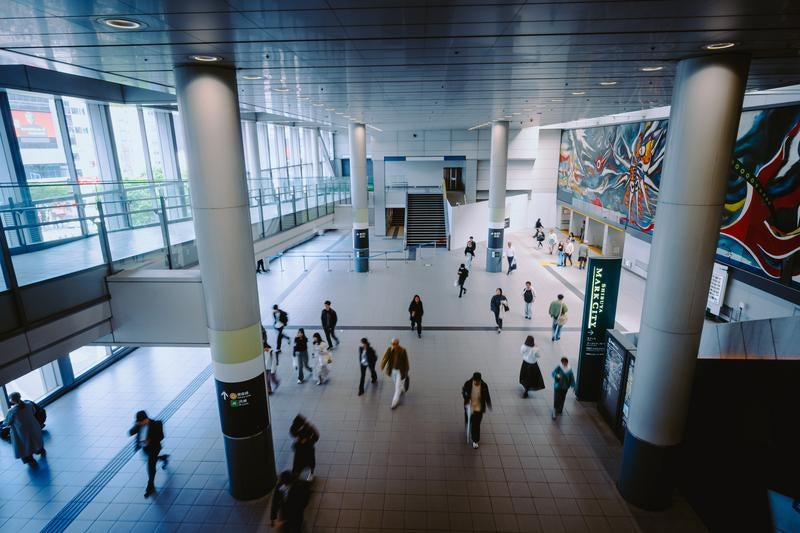

In [26]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# 推論テスト

In [16]:
import onnxruntime

# ONNXモデルロード
onnx_session = onnxruntime.InferenceSession('MPCount_sta.onnx')
input_detail = onnx_session.get_inputs()[0]
output_detail = onnx_session.get_outputs()[0]
input_name = input_detail.name

In [11]:
# パディングサイズ計算用関数
def get_padding(h, w, new_h, new_w):
    if h >= new_h:
        top = 0
        bottom = 0
    else:
        dh = new_h - h
        top = dh // 2
        bottom = dh // 2 + dh % 2
        h = new_h
    if w >= new_w:
        left = 0
        right = 0
    else:
        dw = new_w - w
        left = dw // 2
        right = dw // 2 + dw % 2
        w = new_w

    return (left, top, right, bottom), h, w

In [27]:
import copy

import cv2
import numpy as np

# 画像読み込み
image = cv2.imread('test.jpg')

# 前処理：パディング
unit_size = 16

image_width, image_hight = image.shape[1], image.shape[0]
new_width = (image_width // unit_size + 1) * unit_size if image_width % unit_size != 0 else image_width
new_hight = (image_hight // unit_size + 1) * unit_size if image_hight % unit_size != 0 else image_hight
padding, h, w = get_padding(image_hight, image_width, new_hight, new_width)

left, top, right, bottom = padding[0], padding[1], padding[2], padding[3]
pad_value = 0
padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=pad_value)

debug_image = copy.deepcopy(padded_image)

# 前処理：BGR→RGB
x = cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB)

# 前処理：標準化、BCHW変換
mean, std = [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
x = ((x / 255) - mean) / std
x = np.array(x, dtype=np.float32)
x = x.transpose(2, 0, 1)
x = x.reshape(-1, 3, padded_image.shape[0], padded_image.shape[1])

In [29]:
%%time

# 推論
onnx_result, _ = onnx_session.run(None, {input_name: x})
onnx_result = np.array(onnx_result)

CPU times: user 9.09 s, sys: 1 ms, total: 9.1 s
Wall time: 8.59 s


In [18]:
log_para = 1000
pred_count = onnx_result.sum() / log_para
print(pred_count)

22.48848046875


# 可視化

In [30]:
colormap_image = onnx_result[0, 0]
colormap_image = (colormap_image - colormap_image.min()) / (colormap_image.max() - colormap_image.min() + 1e-5)
colormap_image = (colormap_image * 255).astype(np.uint8)
colormap_image = cv2.applyColorMap(colormap_image, cv2.COLORMAP_JET)

colormap_image = cv2.resize(colormap_image, dsize=(padded_image.shape[1], padded_image.shape[0]))

In [31]:
debug_image = cv2.addWeighted(debug_image, 0.35, colormap_image, 0.65, 1.0)

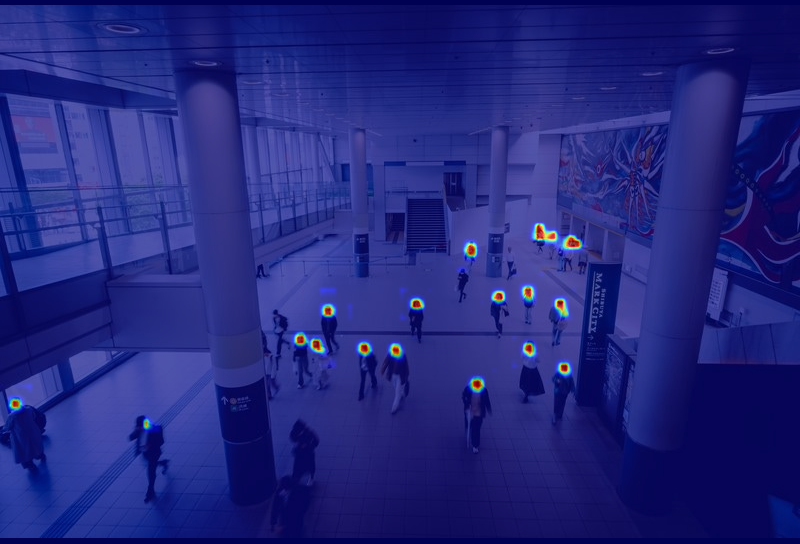

In [32]:
from google.colab.patches import cv2_imshow
cv2_imshow(debug_image)